In [1]:
#!pip3 install scikit-surprise

# IMPORT-IMPORT

In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
"""
from surprise import SVDpp
#from surprise import NMF
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
#from surprise.model_selection import train_test_split

"""

'\nfrom surprise import SVDpp\n#from surprise import NMF\nfrom surprise.model_selection import cross_validate\nfrom surprise import Dataset\nfrom surprise import Reader\nfrom surprise import accuracy\n#from surprise.model_selection import train_test_split\n\n'

# Bersih-bersih Data

In [3]:
#Data
"https://drive.google.com/file/d/1h3L49jcc3kNteHXEUugVZ_rPeJOm_N2Q/view?usp=sharing"

!gdown --id 1h3L49jcc3kNteHXEUugVZ_rPeJOm_N2Q

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1h3L49jcc3kNteHXEUugVZ_rPeJOm_N2Q
To: /content/DataTAAAA.csv
100% 69.1k/69.1k [00:00<00:00, 44.4MB/s]


In [4]:
df_dataFilm = pd.read_csv("DataTAAAA.csv")
df_dataFilm

,nama film,habisnontonfilm,rayculz,djaycoholyc,cenayangfilm,hafilova,cinemuach,watchmenid,moviemenfes,tarizsolis,...,moviegoersid,rivki_mogi,arulfittron,danieldokter,elbert_reyner,rottentomatoes tomato meter,rottentomatoes audience score,imdb,metacritic metascore,metacritic user score
0,Words Bubble Up Like Soda Pop,0.00,0.00,0.00,0.00,0.00,0.00,4.00,3.50,3.20,...,3.69,0.00,0.00,0.00,0.00,5.00,4.40,3.45,0.00,0.00
1,Gunpowder Milkshake,2.65,0.00,3.50,2.50,2.70,0.00,3.38,3.03,0.00,...,0.00,0.00,3.00,3.75,2.90,2.95,2.35,3.00,4.25,3.75
2,Wind River,0.00,0.00,0.00,3.38,4.00,3.75,0.00,2.34,0.00,...,0.00,2.50,3.31,2.94,3.17,4.35,4.50,3.85,3.65,3.95
3,Man in Love,2.92,0.00,0.00,0.00,2.89,0.00,0.00,4.00,2.10,...,0.00,3.75,0.00,2.92,3.00,0.00,0.00,3.50,0.00,0.00
4,Black Island,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.80,2.60,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,Revolutionary Road,0.00,0.00,3.41,0.00,0.00,0.00,0.00,2.17,1.83,...,0.00,0.00,0.00,3.00,0.00,3.35,3.55,3.65,3.45,3.70
639,Righteous Kill,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.50,...,0.00,0.00,0.00,2.46,0.00,0.90,1.85,3.00,1.80,2.45
640,Get Smart,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.55,3.35,3.25,2.70,3.45
641,Friday the 13th,2.44,2.92,3.33,2.42,0.00,0.00,0.00,3.50,4.50,...,0.00,0.00,0.00,4.25,0.00,1.30,2.30,2.75,1.70,3.15


In [5]:
df_dataFilm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nama film                      643 non-null    object 
 1   habisnontonfilm                643 non-null    float64
 2   rayculz                        643 non-null    float64
 3   djaycoholyc                    643 non-null    float64
 4   cenayangfilm                   643 non-null    float64
 5   hafilova                       643 non-null    float64
 6   cinemuach                      643 non-null    float64
 7   watchmenid                     643 non-null    float64
 8   moviemenfes                    643 non-null    float64
 9   tarizsolis                     643 non-null    float64
 10  gilafilmid                     643 non-null    float64
 11  sinemagerbanget                643 non-null    float64
 12  teppy87                        643 non-null    flo

In [6]:
df_coba = df_dataFilm.set_index('nama film')

In [7]:
mtrx_dataFilm = df_coba.to_numpy()

In [8]:
mtrx_dataFilm

array([[0.  , 0.  , 0.  , ..., 3.45, 0.  , 0.  ],
       [2.65, 0.  , 3.5 , ..., 3.  , 4.25, 3.75],
       [0.  , 0.  , 0.  , ..., 3.85, 3.65, 3.95],
       ...,
       [0.  , 0.  , 0.  , ..., 3.25, 2.7 , 3.45],
       [2.44, 2.92, 3.33, ..., 2.75, 1.7 , 3.15],
       [0.  , 0.  , 3.5 , ..., 2.55, 2.05, 2.25]])

In [9]:
mtrx_dataFilm.shape

(643, 35)

In [10]:
from numpy import count_nonzero
sparsity = 1.0 - ( count_nonzero(mtrx_dataFilm) / float(mtrx_dataFilm.size) )
print(sparsity)

0.7516107531659632


75% Data Sparsity

In [11]:
df_dataFilm2 = pd.melt(df_dataFilm, id_vars=["nama film"], 
                  var_name="User", value_name="Rating")
df_dataFilm2

,nama film,User,Rating
0,Words Bubble Up Like Soda Pop,habisnontonfilm,0.00
1,Gunpowder Milkshake,habisnontonfilm,2.65
2,Wind River,habisnontonfilm,0.00
3,Man in Love,habisnontonfilm,2.92
4,Black Island,habisnontonfilm,0.00
...,...,...,...
22500,Revolutionary Road,metacritic user score,3.70
22501,Righteous Kill,metacritic user score,2.45
22502,Get Smart,metacritic user score,3.45
22503,Friday the 13th,metacritic user score,3.15


In [12]:
df_dataFilm2[df_dataFilm2["Rating"]==5]

,nama film,User,Rating
756,Nightcrawler,rayculz,5.0
1053,The Theory of Everything,rayculz,5.0
1719,The Adventures of Tintin,djaycoholyc,5.0
1812,Garuda Di Dadaku,djaycoholyc,5.0
1815,The Twilight Saga: New Moon,djaycoholyc,5.0
...,...,...,...
19724,The Age of Shadows,rottentomatoes tomato meter,5.0
19806,3 Idiots,rottentomatoes tomato meter,5.0
19845,National Parks Adventure,rottentomatoes tomato meter,5.0
20245,This Earth of Mankind,rottentomatoes audience score,5.0


In [13]:
a = (df_dataFilm2.to_numpy() == 0).mean()
print (a)

0.2505369177219877


# ANALISA DESKRIPTIF

In [14]:
n_users = len(df_dataFilm2['User'].unique())
n_items = len(df_dataFilm2['nama film'].unique())
R_shape = (n_users, n_items)
print(str(n_users) + ' users')
print(str(n_items) + ' items')

35 users
643 items


In [15]:
df_dataFilm2['Rating'].describe()

count    22505.000000
mean         0.747867
std          1.366432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of ratings')

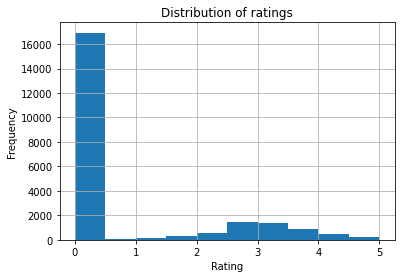

In [16]:
df_dataFilm2['Rating'].hist(grid=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of ratings')

In [17]:
count = (df_dataFilm2['Rating'] == 0).sum()
print('Count of 0 in Column  Rating : ', count)

Count of 0 in Column  Rating :  16915


In [18]:
# Copy Dulu
df_dataFilmOlah = df_dataFilm2.copy()

In [19]:
item_info = df_dataFilmOlah['nama film']
item_info.head()

0    Words Bubble Up Like Soda Pop
1              Gunpowder Milkshake
2                       Wind River
3                      Man in Love
4                     Black Island
Name: nama film, dtype: object

In [20]:
df_dataFilmOlah

,nama film,User,Rating
0,Words Bubble Up Like Soda Pop,habisnontonfilm,0.00
1,Gunpowder Milkshake,habisnontonfilm,2.65
2,Wind River,habisnontonfilm,0.00
3,Man in Love,habisnontonfilm,2.92
4,Black Island,habisnontonfilm,0.00
...,...,...,...
22500,Revolutionary Road,metacritic user score,3.70
22501,Righteous Kill,metacritic user score,2.45
22502,Get Smart,metacritic user score,3.45
22503,Friday the 13th,metacritic user score,3.15


In [21]:
df_dataFilmOlah.describe()

,Rating
count,22505.000000
mean,0.747867
std,1.366432
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


In [22]:
"""
X = df_dataFilmOlah[['nama film', 'User']].values
y = df_dataFilmOlah['Rating'].values
print('X')
print(X)
print('y')
print(y)
"""

"\nX = df_dataFilmOlah[['nama film', 'User']].values\ny = df_dataFilmOlah['Rating'].values\nprint('X')\nprint(X)\nprint('y')\nprint(y)\n"

In [23]:
#Sparsity Matrix R
print(len(mtrx_dataFilm.nonzero()[0]) / float(mtrx_dataFilm.shape[0] * mtrx_dataFilm.shape[1]))

0.24838924683403688


Sparsity Sekitar 24%

# Non-Negative Matrix Factorization

In [24]:
!pip3 install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
from surprise import NMF
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [117]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_dataFilmOlah[['User', 'nama film', 'Rating']], reader)

In [118]:
SNMF = NMF()
cross_validate(SNMF, data, measures=['RMSE', 'MAE'], verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9771  0.9717  0.9739  0.9723  0.9845  0.9759  0.0047  
MAE (testset)     0.8346  0.8330  0.8349  0.8351  0.8408  0.8357  0.0027  
Fit time          1.10    1.07    1.08    1.06    1.07    1.08    0.01    
Test time         0.16    0.04    0.03    0.03    0.03    0.06    0.05    


{'fit_time': (1.1018314361572266,
  1.0742721557617188,
  1.0798335075378418,
  1.0626838207244873,
  1.0673573017120361),
 'test_mae': array([0.83463368, 0.83303806, 0.83493919, 0.83511912, 0.84082611]),
 'test_rmse': array([0.97711925, 0.97169191, 0.97388766, 0.97227603, 0.98452749]),
 'test_time': (0.15774774551391602,
  0.03705787658691406,
  0.025560855865478516,
  0.029213666915893555,
  0.02617788314819336)}

In [38]:
nmf_model = NMF(3)     # 3 latents factors

#R ~ W*H
# Matrix factorization               
#nmf_model.fit(mtrx_dataFilm)                     
#Theta = nmf_model.fit_transform(mtrx_dataFilm)       
#M = nmf_model.components_.T
W = nmf_model.fit_transform(mtrx_dataFilm);
H = nmf_model.components_;
R_Pred = np.dot(W,H).round(2)
#W = nmf_model.fit_transform(mtrx_dataFilm);
#H = nmf_model.components_;
#R_Pred = np.dot(W,H)       

#Making the predictions
#R_Pred = M.dot(Theta.T)              
#R_Pred = R_Pred.T                    

#print('Item features - M:', M.shape)
#print('User features - Theta:', Theta.shape)
print
print('R ~ M * Theta:')
print(R_Pred)
print(R_Pred.shape)

R ~ M * Theta:
[[0.26 0.17 0.79 ... 5.14 0.29 0.43]
 [0.91 0.71 2.68 ... 3.4  3.42 3.8 ]
 [0.65 0.57 1.91 ... 4.22 3.95 4.41]
 ...
 [0.   0.12 0.01 ... 2.99 2.64 2.97]
 [0.76 0.54 2.23 ... 2.85 1.91 2.13]
 [0.09 0.13 0.27 ... 1.95 1.67 1.87]]
(643, 35)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [39]:
df_W = pd.DataFrame(W)
df_W

,0,1,2
0,0.052957,0.229013,1.139529
1,0.623247,0.813053,0.000000
2,0.719452,0.577602,0.218533
3,0.000000,0.616261,0.329270
4,0.000000,0.000000,0.481838
...,...,...,...
638,0.585676,0.373855,0.283519
639,0.304717,0.136154,0.233912
640,0.480961,0.000000,0.343976
641,0.347222,0.675746,0.149782


In [40]:
df_H = pd.DataFrame(H)
df_H

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,0.254928,0.000000,0.113201,0.558395,0.214743,0.000000,0.000000,0.000000,0.640887,...,0.000000,0.000000,0.000000,1.041070,0.502515,5.324895,3.832634,3.341793,5.494513,6.101608
1,1.119580,0.672310,3.296700,2.157857,1.646841,0.872732,1.924849,3.299677,3.332882,2.916082,...,1.120838,1.141958,3.047886,3.728958,3.114371,0.000000,0.479525,1.614063,0.000000,0.000000
2,0.006403,0.000000,0.031629,0.000000,0.000000,0.000000,0.000000,1.049948,0.450849,0.000000,...,0.149081,0.050187,0.000000,0.000000,0.000000,1.991372,3.767542,4.027278,0.000000,0.093263


In [41]:
"""
R_Pred = R_Pred.round(1)
R_Pred
"""

'\nR_Pred = R_Pred.round(1)\nR_Pred\n'

In [42]:
R_Pred1 = np.asarray(R_Pred).flatten()
R_Pred1

array([0.26, 0.17, 0.79, ..., 1.95, 1.67, 1.87])

In [43]:
df_nnmf = pd.DataFrame(R_Pred)

In [44]:
df_nnmf

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.26,0.17,0.79,0.50,0.41,0.21,0.44,1.95,1.28,0.70,...,0.43,0.32,0.70,0.91,0.74,2.55,4.61,5.14,0.29,0.43
1,0.91,0.71,2.68,1.83,1.69,0.84,1.57,2.68,2.71,2.77,...,0.91,0.93,2.48,3.68,2.85,3.32,2.78,3.40,3.42,3.80
2,0.65,0.57,1.91,1.33,1.35,0.66,1.11,2.14,2.02,2.15,...,0.68,0.67,1.76,2.90,2.16,4.27,3.86,4.22,3.95,4.41
3,0.69,0.41,2.04,1.33,1.01,0.54,1.19,2.38,2.20,1.80,...,0.74,0.72,1.88,2.30,1.92,0.66,1.54,2.32,0.00,0.03
4,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.51,0.22,0.00,...,0.07,0.02,0.00,0.00,0.00,0.96,1.82,1.94,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,0.42,0.40,1.24,0.87,0.94,0.45,0.72,1.53,1.37,1.47,...,0.46,0.44,1.14,2.00,1.46,3.68,3.49,3.70,3.22,3.60
639,0.15,0.17,0.46,0.33,0.39,0.18,0.26,0.69,0.56,0.59,...,0.19,0.17,0.41,0.82,0.58,2.09,2.11,2.18,1.67,1.88
640,0.00,0.12,0.01,0.05,0.27,0.10,0.00,0.36,0.16,0.31,...,0.05,0.02,0.00,0.50,0.24,3.25,3.14,2.99,2.64,2.97
641,0.76,0.54,2.23,1.50,1.31,0.66,1.30,2.39,2.32,2.19,...,0.78,0.78,2.06,2.88,2.28,2.15,2.22,2.85,1.91,2.13


In [45]:
sparsity = 1.0 - ( count_nonzero(mtrx_dataFilm) / float(mtrx_dataFilm.size) )
print(sparsity)

0.7516107531659632


In [46]:
df_dataFilmOlah["Rating"] = R_Pred1

In [47]:
df_dataFilmOlah

,nama film,User,Rating
0,Words Bubble Up Like Soda Pop,habisnontonfilm,0.26
1,Gunpowder Milkshake,habisnontonfilm,0.17
2,Wind River,habisnontonfilm,0.79
3,Man in Love,habisnontonfilm,0.50
4,Black Island,habisnontonfilm,0.41
...,...,...,...
22500,Revolutionary Road,metacritic user score,2.01
22501,Righteous Kill,metacritic user score,1.95
22502,Get Smart,metacritic user score,1.95
22503,Friday the 13th,metacritic user score,1.67


In [48]:
df_dataFilmOlah.describe()

,Rating
count,22505.000000
mean,0.778717
std,1.035786
min,0.000000
25%,0.070000
50%,0.350000
75%,0.980000
max,5.740000


In [ ]:
"""
df_dataFilmNNMF = pd.melt(df_nnmf, id_vars=["movie_id"], 
                  var_name="User_id", value_name="Rating")
df_dataFilmNNMF
"""

In [49]:
count = (df_dataFilmOlah['Rating'] == 0).sum()
print('Count of 0 in Column  Rating : ', count)

Count of 0 in Column  Rating :  2839


Text(0.5, 1.0, 'Distribution of ratings')

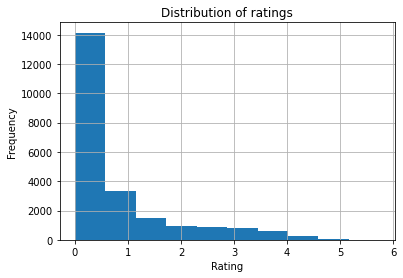

In [50]:
df_dataFilmOlah['Rating'].hist(grid=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of ratings')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


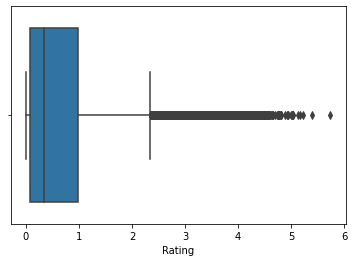

In [51]:
import seaborn as sns

sns.boxplot(df_dataFilmOlah['Rating'])

In [ ]:
"""
for x in ['Rating']:
    q75,q25 = np.percentile(df_dataFilmOlah.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_dataFilmOlah.loc[df_dataFilmOlah[x] < min,x] = np.nan
    df_dataFilmOlah.loc[df_dataFilmOlah[x] > max,x] = np.nan
"""

In [ ]:
#df_dataFilmOlah.isnull().sum()

In [ ]:
#df_dataFilmOlah = df_dataFilmOlah.dropna(axis = 0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


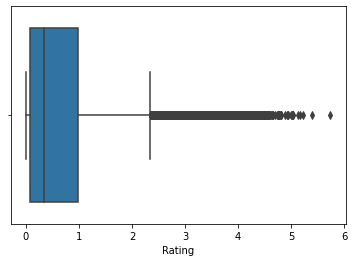

In [52]:
sns.boxplot(df_dataFilmOlah['Rating'])

In [ ]:
"""
#Cek nol Rating
df_dataFilmNNMF['Rating'].hist(grid=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of ratings')
"""

In [53]:
# Copy Dulu
df_dataFilmOlah2 = df_dataFilmOlah.copy()

In [54]:
#Encoding
fg_namafilm = LabelEncoder()
fg_namafilm.fit(df_dataFilmOlah2['nama film'])

encode_fg_namafilm = fg_namafilm.transform(df_dataFilmOlah2['nama film'])
df_dataFilmOlah2['nama film'] = encode_fg_namafilm

#dencode_fg_namafilm = fg_namafilm.inverse_transform(df_dataFilmNNMF['movie_id'])
#df_dataFilmNNMF['movie_id'] = encode_fg_namafilm

fg_User = LabelEncoder()
fg_User.fit(df_dataFilmOlah2['User'])

encode_fg_User = fg_User.transform(df_dataFilmOlah2['User'])
df_dataFilmOlah2['User'] = encode_fg_User

In [55]:
#Pembuatan Matrix R
def ConvertToDense(X, y, shape):  # from R=(X,y), in sparse format 
    row  = X[:,0]
    col  = X[:,1]
    data = y
    matrix_sparse = sparse.csr_matrix((data,(row,col)), shape=(shape[1]+1,shape[0]+1))  # sparse matrix in compressed format (CSR)
    R = matrix_sparse.todense()   # convert sparse matrix to dense matrix, same as: matrix_sparse.A
    R = R[1:,1:]                  # removing the "Python starts at 0" offset
    R = np.asarray(R)             # convert matrix object to ndarray object
    return R

In [56]:
X_nnmf = df_dataFilmOlah2[['nama film', 'User']].values
y_nnmf = df_dataFilmOlah2['Rating'].values

In [57]:
matrix_NNMF = ConvertToDense(X_nnmf, y_nnmf, R_shape)
matrix_NNMF

array([[0.  , 0.46, 0.13, ..., 0.  , 1.6 , 0.  ],
       [0.61, 3.45, 0.  , ..., 0.14, 1.28, 0.  ],
       [0.25, 0.12, 1.17, ..., 0.  , 0.64, 0.  ],
       ...,
       [0.73, 2.13, 0.  , ..., 0.78, 2.01, 0.  ],
       [0.01, 0.03, 0.24, ..., 2.73, 0.35, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [58]:
sparsity = 1.0 - ( count_nonzero(matrix_NNMF) / float(matrix_NNMF.size) )
print(sparsity)

0.1545878693623639


# Hyperparameter Tuning : RANDOM FOREST & Evaluation

In [87]:
#SPLIT DATA Train, Test
X_train, X_test, y_train, y_test = train_test_split(X_nnmf, y_nnmf, test_size=0.2) #Test Size= 20%

R_train = ConvertToDense(X_train, y_train, R_shape)
R_test = ConvertToDense(X_test, y_test, R_shape)

print('Matrix R_train')
print(R_train)
print(R_train.shape)
print
print('Matrix R_test')
print(R_test)
print(R_test.shape)

Matrix R_train
[[0.   0.46 0.13 ... 0.   1.6  0.  ]
 [0.   3.45 0.   ... 0.14 1.28 0.  ]
 [0.25 0.12 0.   ... 0.   0.64 0.  ]
 ...
 [0.73 2.13 0.   ... 0.78 2.01 0.  ]
 [0.01 0.03 0.   ... 2.73 0.35 0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
(643, 35)
Matrix R_test
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.61 0.   0.   ... 0.   0.   0.  ]
 [0.   0.   1.17 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.24 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
(643, 35)


Random Forest

In [88]:
n_estimators_list = [50,100, 150, 200, 250,300]

In [89]:
rmse_result_rftest =[1.1991015878474296,1.198929307392028,1.194340707887853,1.1941881375059553,1.196211806933292,1.1935313832204968]
mae_result_rftest =[0.8499195734281271,0.8526048878027105,0.8499289343108939,0.8506605754276828,0.8514280559875582,0.8496128267792341]
#RF Data Test
for i in n_estimators_list:
  rf = RandomForestRegressor(n_estimators=i)
  rf.fit(X_train, y_train)
  test_pred_y = rf.predict(X_test)
  mse = mean_squared_error(y_test, test_pred_y)
  rmse_rf = mse**.5
  mae_rf = mean_absolute_error(y_test, test_pred_y)
  print("number of trees: ",i)
  print("Root Mean Square Error (RMSE) data test:")
  rmse_result_rftest.append(rmse_rf) 
  print(rmse_rf)
  print
  print("Mean Absolute Error (MAE) data test:")
  mae_result_rftest.append(mae_rf)
  print(mae_rf)

number of trees:  50
Root Mean Square Error (RMSE) data test:
1.1991015878474296
Mean Absolute Error (MAE) data test:
0.8499195734281271
number of trees:  100
Root Mean Square Error (RMSE) data test:
1.198929307392028
Mean Absolute Error (MAE) data test:
0.8526048878027105
number of trees:  150
Root Mean Square Error (RMSE) data test:
1.194340707887853
Mean Absolute Error (MAE) data test:
0.8499289343108939
number of trees:  200
Root Mean Square Error (RMSE) data test:
1.1941881375059553
Mean Absolute Error (MAE) data test:
0.8506605754276828
number of trees:  250
Root Mean Square Error (RMSE) data test:
1.196211806933292
Mean Absolute Error (MAE) data test:
0.8514280559875582
number of trees:  300
Root Mean Square Error (RMSE) data test:
1.1935313832204968
Mean Absolute Error (MAE) data test:
0.8496128267792341


In [90]:
#RF Data Train
rmse_result_rftrain =[]
mae_result_rftrain =[]
for i in n_estimators_list:
  rf = RandomForestRegressor(n_estimators=i)
  rf.fit(X_train, y_train)
  train_pred_y = rf.predict(X_train)
  mse = mean_squared_error(y_train, train_pred_y)
  rmse = mse**.5
  mae = mean_absolute_error(y_train, train_pred_y)
  print("number of trees: ",i)
  print("Root Mean Square Error (RMSE) data train:")
  rmse_result_rftrain.append(rmse) 
  print(rmse)
  print
  print("Mean Absolute Error (MAE) data train:")
  mae_result_rftrain.append(mae)
  print(mae)

number of trees:  50
Root Mean Square Error (RMSE) data train:
0.4495568093640557
Mean Absolute Error (MAE) data train:
0.31482587202843815
number of trees:  100
Root Mean Square Error (RMSE) data train:
0.44353115927951775
Mean Absolute Error (MAE) data train:
0.31302936569651185
number of trees:  150
Root Mean Square Error (RMSE) data train:
0.44137697454102687
Mean Absolute Error (MAE) data train:
0.3126447048803969
number of trees:  200
Root Mean Square Error (RMSE) data train:
0.4411415012238195
Mean Absolute Error (MAE) data train:
0.31263595034436786
number of trees:  250
Root Mean Square Error (RMSE) data train:
0.4408439027072826
Mean Absolute Error (MAE) data train:
0.312668111530771
number of trees:  300
Root Mean Square Error (RMSE) data train:
0.4401419914051901
Mean Absolute Error (MAE) data train:
0.31249535843886544


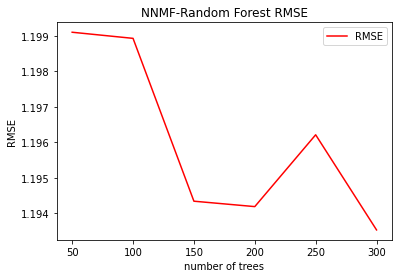

In [91]:
plt.plot(n_estimators_list, rmse_result_rftest,label = "RMSE", color="red")
plt.title('NNMF-Random Forest RMSE')
plt.xlabel('number of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()

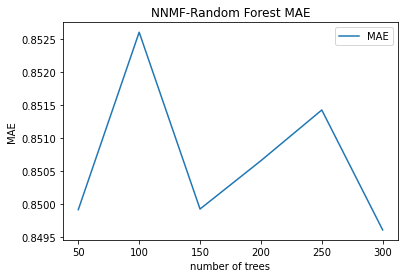

In [92]:
plt.plot(n_estimators_list, mae_result_rftest,label = "MAE")
plt.title('NNMF-Random Forest MAE')
plt.xlabel('number of trees')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [94]:
y_pred_rf = pd.DataFrame({ "actual": y_test, "predicted_prob": test_pred_y}) 
y_pred_rf

,actual,predicted_prob
0,0.00,0.036433
1,0.00,0.522933
2,1.13,0.664833
3,0.54,0.104933
4,0.59,0.046900
...,...,...
4496,1.00,0.886367
4497,0.00,0.781700
4498,0.19,0.428833
4499,2.71,0.982867


RandomizeSearchCV

In [66]:
n_estimators = [50,100, 150, 200, 250,300] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [67]:
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),param_distributions = random_grid) #n_iter = 100, cv = 5, verbose=2, random_state=35
rf_random.fit(X_train, y_train)
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}  



In [95]:
randmf = RandomForestRegressor(n_estimators = 200, min_samples_split = 10, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 100, bootstrap=True) 
randmf.fit(X_train, y_train) 

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200)

In [96]:
#Test
prediction_rg_test = randmf.predict(X_test)
mse = mean_squared_error(y_test, prediction_rg_test)
rmse_rg = mse**.5
mae_rg = mean_absolute_error(y_test, prediction_rg_test)
print("Root Mean Square Error (RMSE) data test:")
print(rmse_rg)
print
print("Mean Absolute Error (MAE) data test:")
print(mae_rg)

Root Mean Square Error (RMSE) data test:
1.0777348285404982
Mean Absolute Error (MAE) data test:
0.7847254162935284


In [97]:
#Train
prediction_rg_train = randmf.predict(X_train)
mse = mean_squared_error(y_train, prediction_rg_train)
rmse = mse**.5
mae = mean_absolute_error(y_train, prediction_rg_train)
print("Root Mean Square Error (RMSE) data train:")
print(rmse)
print
print("Mean Absolute Error (MAE) data train:")
print(mae)

Root Mean Square Error (RMSE) data train:
0.8565189203385571
Mean Absolute Error (MAE) data train:
0.6165796029251782


In [98]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, "predicted_prob": randmf.predict((X_test))}) 
y_pred_rf1

,actual,predicted_prob
0,0.00,0.157921
1,0.00,0.400671
2,1.13,0.934669
3,0.54,0.480687
4,0.59,0.153944
...,...,...
4496,1.00,0.628710
4497,0.00,0.692379
4498,0.19,0.722944
4499,2.71,0.775511


In [72]:
#y_pred_rf1.to_csv('predicted NNMF.csv', index=False)

GridSearchCV

In [73]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [50,100, 150, 200, 250,300]}

In [74]:
g_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid)#cv = 5, n_jobs = 1, verbose = 0, return_train_score=True

In [75]:
g_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [76]:
print ('Grid Search: ', param_grid, '\n')
# print the best parameters
print ('Best Parameters: ', g_search.best_params_, ' \n')

Grid Search:  {'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [50, 100, 150, 200, 250, 300]} 

Best Parameters:  {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 150}  



In [99]:
randmf_gs = RandomForestRegressor(n_estimators = 150, max_features = 'auto', max_depth= 5, bootstrap=True) 
randmf_gs.fit(X_train, y_train) 

RandomForestRegressor(max_depth=5, n_estimators=150)

In [100]:
y_pred_rf1GS = pd.DataFrame( { "actual": y_test, "predicted_prob": randmf_gs.predict(( X_test ))}) 
y_pred_rf1GS

,actual,predicted_prob
0,0.00,0.713642
1,0.00,0.737707
2,1.13,0.942179
3,0.54,0.884491
4,0.59,0.717423
...,...,...
4496,1.00,0.893639
4497,0.00,0.885167
4498,0.19,0.747478
4499,2.71,0.847919


In [101]:
#test
prediction_gs_test = randmf_gs.predict(X_test)
mse = mean_squared_error(y_test, prediction_gs_test)
rmse_gs = mse**.5
mae_gs = mean_absolute_error(y_test, prediction_gs_test)
print("Root Mean Square Error (RMSE) data test:")
print(rmse_gs)
print
print("Mean Absolute Error (MAE) data test:")
print(mae_gs)

Root Mean Square Error (RMSE) data test:
1.0359709367546721
Mean Absolute Error (MAE) data test:
0.7641199946590987


In [102]:
#train
prediction_gs_train = randmf_gs.predict(X_train)
mse = mean_squared_error(y_train, prediction_gs_train)
rmse = mse**.5
mae = mean_absolute_error(y_train, prediction_gs_train)
print("Root Mean Square Error (RMSE) data train:")
print(rmse)
print
print("Mean Absolute Error (MAE) data train:")
print(mae)

Root Mean Square Error (RMSE) data train:
1.0164392943710043
Mean Absolute Error (MAE) data train:
0.7531571662624866


# Rating Prediction

In [103]:
"""
def make_recommendation_newuser(item_sim, prediction, item_idx, k=5):
    '''
    item_idx ...... select an item
    k  ............ number of movies to recommend
    '''
    reco_item_df = pd.DataFrame(item_sim).iloc[item_idx, :] 
    user_prediction_df_user = pd.DataFrame(prediction)
    reco_item_df = pd.concat([reco_item_df,user_prediction_df_user, item_info], axis=1)   # merge list with the movie's title
    reco_item_df.columns = ['similarity','rating prediction','title']
    reco_item_df = reco_item_df.sort_values(by='similarity',ascending=False)
    reco_item_df.fillna(0,inplace=True)

    print('currently looking at movie:', reco_item_df.iloc[0]['title'])
    print('Recommended movies title: ')
    print(reco_item_df)         # returns the 5 unseen movies with the best predicted ratings print(reco_item_df)[1:k+1]



item_sim = cosine_similarity(matrix_R)                      # Use item features matrix to compute movie-to-movie similarity matrices
make_recommendation_newuser(item_sim, prediction, item_idx=0, k=500)
make_recommendation_newuser(item_sim, prediction, item_idx=4, k=5)
make_recommendation_newuser(item_sim, prediction, item_idx=638, k=5)
"""

"\ndef make_recommendation_newuser(item_sim, prediction, item_idx, k=5):\n    '''\n    item_idx ...... select an item\n    k  ............ number of movies to recommend\n    '''\n    reco_item_df = pd.DataFrame(item_sim).iloc[item_idx, :] \n    user_prediction_df_user = pd.DataFrame(prediction)\n    reco_item_df = pd.concat([reco_item_df,user_prediction_df_user, item_info], axis=1)   # merge list with the movie's title\n    reco_item_df.columns = ['similarity','rating prediction','title']\n    reco_item_df = reco_item_df.sort_values(by='similarity',ascending=False)\n    reco_item_df.fillna(0,inplace=True)\n\n    print('currently looking at movie:', reco_item_df.iloc[0]['title'])\n    print('Recommended movies title: ')\n    print(reco_item_df)         # returns the 5 unseen movies with the best predicted ratings print(reco_item_df)[1:k+1]\n\n\n\nitem_sim = cosine_similarity(matrix_R)                      # Use item features matrix to compute movie-to-movie similarity matrices\nmake_rec

In [104]:
item_sim = cosine_similarity(matrix_NNMF)                      # Use item features matrix to compute movie-to-movie similarity matrices
actual = y_test

In [105]:
def make_recommendation_newuser(item_sim, prediction, item_idx, k=5):
    '''
    item_idx ...... select an item
    k  ............ number of movies to recommend
    '''
    reco_item_df = pd.DataFrame(item_sim.round(2)).iloc[item_idx, :] 
    user_prediction_df_user = pd.DataFrame(prediction.round(2))
    #actual_df_user = pd.DataFrame(actual)
    reco_item_df = pd.concat([reco_item_df, user_prediction_df_user, item_info], axis=1)   # merge list with the movie's title
    reco_item_df.columns = ['similarity','rating prediction','title']
    reco_item_df = reco_item_df.sort_values(by='similarity',ascending=False)
    reco_item_df.fillna(0,inplace=True)
    df = pd.DataFrame(reco_item_df[1:k+1])
    
    print('currently looking at movie:', reco_item_df.iloc[0]['title'])
    print('Recommended movies title: ')
    #print(reco_item_df)         # returns the 5 unseen movies with the best predicted ratings print(reco_item_df)[1:k+1]

    return df

#make_recommendation_newuser(item_sim, prediction, item_idx=4, k=5)
#make_recommendation_newuser(item_sim, prediction, item_idx=638, k=5)

In [106]:
make_recommendation_newuser(item_sim, prediction_gs_test, item_idx=0, k=642)

currently looking at movie: Words Bubble Up Like Soda Pop
Recommended movies title: 


,similarity,rating prediction,title
207,0.84,0.55,Silencer
8,0.84,0.73,Five Feet Apart
520,0.82,0.74,The Spiderwick Chronicles
226,0.82,0.71,The Hurricane Heist
104,0.81,0.85,Crazy Awesome Teachers
...,...,...,...
592,0.12,0.91,American Ultra
538,0.11,0.87,Never Back Down
425,0.10,0.63,Silent Hill: Revelation
23,0.10,0.85,Ali & Ratu Ratu Queens


In [107]:
make_recommendation_newuser(item_sim, prediction_gs_test, item_idx=99, k=642)

currently looking at movie: #Alive
Recommended movies title: 


,similarity,rating prediction,title
100,0.89,0.99,My Octopus Teacher
96,0.87,0.71,The Babysitter: Killer Queen
112,0.86,0.61,Muppets Most Wanted
413,0.83,0.82,Cats & Dogs: The Revenge of Kitty Galore
360,0.79,0.64,Suzzanna: Buried Alive
...,...,...,...
218,0.15,0.83,The Bye Bye Man
2,0.14,0.94,Wind River
102,0.13,0.73,Ave Maryam
276,0.12,0.85,Take Me


In [108]:
coba = make_recommendation_newuser(item_sim, prediction_gs_test, item_idx=10, k=642)
coba.to_csv('testhasil.csv', index=False)

currently looking at movie: Fantastic Fungi
Recommended movies title: 


# TEST

In [ ]:
R = [
     [0,3,0,0.5,0],
     [0,0,5,2.5,0],
     [5,1,0,0,0],
     [5,1,0,0,2],
     [0,1,0,3.5,0],
    ]
R = np.array(R)
nmf = NMF()
W = nmf.fit_transform(R);
H = nmf.components_;
nR = np.dot(W,H)
print(nR)

In [ ]:
R

In [ ]:
df_r = pd.DataFrame(nR.round(1))
df_r

In [ ]:
V = np.array([[0,1,0,1,2,2],
              [2,3,1,1,2,2],
              [1,1,1,0,1,1],
              [0,2,3,4,1,1],
              [0,0,0,0,1,0]])

V = pd.DataFrame(V, columns=['John', 'Alice', 'Mary', 'Greg', 'Peter', 'Jennifer'])
V.index = ['Vegetables', 'Fruits', 'Sweets', 'Bread', 'Coffee']

nmf = NMF(3)
nmf.fit(V)

H = pd.DataFrame(np.round(nmf.components_,2), columns=V.columns)
H.index = ['Fruits pickers', 'Bread eaters',  'Veggies']

W = pd.DataFrame(np.round(nmf.transform(V),2), columns=H.index)
W.index = V.index

reconstructed = pd.DataFrame(np.round(np.dot(W,H),2), columns=V.columns)
reconstructed.index = V.index

In [ ]:
reconstructed